<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
df = pd.read_csv('data/job_listings.csv', usecols=['title', 'description'])
print(df.shape)
df.head()
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
                


(426, 2)


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [3]:
from bs4 import BeautifulSoup
import requests

df['description'] = df['description'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())

In [4]:
df.head(3)


,description,title
0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level


In [5]:
#remove extra character
df['description'] = df['description'].str.replace("b'", '')
df['description'] = df['description'].str.replace ('b"', '')
df['description'] = df['description'].str.replace ('\n', '')
df['description'] = df['description'].str.lower().str.strip()

In [6]:
df.sample(7)

,description,title
175,we\'re looking for data scientists who are pas...,"Data Scientist, Product"
234,nauvera inc looking for an entrepreneurial dat...,DATA SCIENTIST
239,our story:\nulta beauty is the largest special...,Data Scientist (Machine Learning)
424,senior data scientist\njob description\n\nabou...,Senior Data Scientist
54,"at uber, we ignite opportunity by setting the ...",Data Scientist - Forecasting and Anomaly Detec...
141,about the role\nbabylist is looking for a data...,Data Analyst
31,we\xe2\x80\x99re looking for a data scientist ...,Data Scientist


In [7]:
df['description'] = df['description'].str.replace(r'(https?:\/\/.*[\r\n]*)', ' ')

In [8]:
df['description'].value_counts().to_frame()

description
minimum qualifications:\nmaster's degree in ope...            3
you will collaborate with the brightest technic...            3
about the company\n\ncivis analytics is a techn...            3
we\'re looking for data scientists who are pass...            3
channel and intellectual property protection se...            2
...                                                         ...
company overview\nthe complex ecosystem of bact...            1
here at universal parks & resorts\xe2\x84\xa2, ...            1
about the team & role\n------------------------...            1
keysight marketing is hiring a data scientist t...            1
los gatos, california\nscience and analytics\nt...            1

[356 rows x 1 columns]

## 2) Use Spacy to tokenize the listings 

In [9]:
nlp = spacy.load("en_core_web_lg")


In [10]:
STOP_WORDS = nlp.Defaults.stop_words.union(['data', 'science','\n\n',':\n'])
df['tokens'] = df['description'].apply(lambda x: [token.lemma_ for token in nlp(x) if (token not in STOP_WORDS) and (token.is_punct != True)])
df.sample(5)


,description,title,tokens
232,"functional description:\ndesigns, develops and...",Data Scientist 2,"[functional, description:\ndesign, develop, an..."
86,position description\ndemonstrates up-to-date ...,Data Scientist (GEC11901),"[position, description\ndemonstrate, up, to, d..."
414,we are looking for a senior data scientist wit...,Data Scientist – Content Marketing Acquisition,"[-PRON-, be, look, for, a, senior, data, scien..."
59,internshipwhat you\'ll be doing...\nas a data ...,Data Scientist Intern,"[internshipwhat, you\'ll, be, do, \nas, a, dat..."
335,about spin\n\nspin operates electric scooters ...,Data Scientist,"[about, spin\n\nspin, operate, electric, scoot..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [11]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

#remove domain specific word
vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(df['description'])

# Get sparse dtm
dtm = vect.transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,00,000,02115,03,0356,04,062,06366,10,100,1000,1001,1008,100k,100x,105,1079302,1082692,10b,10ms,10x,11,112,114157802,12,120,125,126,130,1324b,138,14,140,15,150,15000,159m,16,1605,165,169334br,17,170,17b,18,180,180008jq,18b,19,190,190007ji,19000bn4,19000c1k,19004162,1901744,1904,1904labs,1905,19050,1938,1944,1967,1971,1975,1979,1988,199,1994,1999,1b,1strategy,1tb,20,200,2000,200020183,200041695,2004,2008,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2050,21,210,2145,24,24m,25,250,25256,26,260,...,x9c,x9cbang,x9cbest,x9cbig,x9cchristmas,x9ccustomer,x9cget,x9chave,x9chr,x9cinnovate,x9clive,x9cmachine,x9cmake,x9cpassion,x9cpeople,x9cplant,x9cpragmatism,x9cprovide,x9cquality,x9creasonable,x9crivr,x9cscientific,x9cscorecards,x9cstem,x9cstorytelling,x9csubject,x9csurge,x9cteam,x9cthe,x9ctop,x9ctraditional,x9cvirtual,x9cwe,x9cwhole,x9cwhy,x9cwin,x9cwork,x9cwow,x9cwowing,x9d,xa0,xa2,xa6,xa6and,xa6apple,xa6curious,xa6protect,xa6rapidly,xa7,xa8ve,xa9,xa9al,xa9cor,xac,xae,xafve,xb7,xb7experience,xb7identify,xb7knowledge,xbb,xbf,xbox,xc2,xc3,xe2,xef,xgboost,xpo,yards,year,yeara,yearas,yearcollects,yeardescription,yearjob,yearlrs,years,yearsexperience,yearsummary,yearthe,yeartitle,yearworking,yes,yeti,yield,york,young,youtube,yrs,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [12]:
#sum_words = dtm.sum(axis=0) 
wc_top20= dtm.sum(axis=0).sort_values(ascending=False)[:20]
wc_top20

data           4273
xe2            1384
x80            1371
experience     1190
business       1164
team            935
work            925
science         920
learning        871
analytics       710
skills          663
analysis        658
machine         653
nexperience     601
models          580
x99s            558
product         557
statistical     542
new             511
solutions       509
dtype: int64

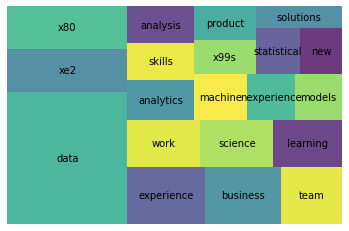

In [13]:
#Visualization
import squarify
import matplotlib.pyplot as plt
squarify.plot(sizes=wc_top20.values, label=wc_top20.index[:20], alpha=.8 )
plt.axis('off')
plt.show()

In [15]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [16]:
# from spacy.tokenizer import Tokenizer
# from tokenize import tokenize

# Tunning Parameters
#nlp.Defaults.stop_word => spacy stop word
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                       tokenizer=tokenize,
                       min_df=5, # words appears in atleast 5 document
                       ngram_range=(1,2), # 
                       max_df=.80, # if words appear in the atleast 80% of the document ignore it 
                       max_features=5000)

# Create a vocabulary and get word counts per document
dtm_tfidf = tfidf.fit_transform(df.description.values) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm_tfidf.head()
# Tunning Parameters
#nlp.Defaults.stop_word => spacy stop word
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                       tokenizer=tokenize,
                       min_df=5, # words appears in atleast 5 document
                       ngram_range=(1,2), # 
                       max_df=.80, # if words appear in the atleast 80% of the document ignore it 
                       max_features=5000)

# Create a vocabulary and get word counts per document
dtm_tfidf = tfidf.fit_transform(df.description.values) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm_tfidf.head()

,,$,+,+ city,+ year,+ years\xe2\x80\x99,0,0 2,1,1 year,10,10 year,100,100 company,100 country,"100,000",12,12 month,15,2,2 +,2 4,2 year,2 years\xe2\x80\x99,20,200,2013,2015,2019,25,3,3 +,3 5,3 year,3.0,3.0 4-point,30,3rd,3rd party,4,4 year,4-point,40,401(k,401k,5,5 +,5 year,50,500,500 company,6,6 +,60,600,600 city,7,7 year,8,8 year,90-day,\xe2\x80\x93,\xe2\x80\x93 directorate,\xe2\x80\x93 happen,\xe2\x80\x93 single,\xe2\x80\x94,\xe2\x80\x9cbig,\xe2\x80\x9cbig data\xe2\x80\x9d,aa,aa employer,ab,abilities\nproblem,abilities\nproblem solve,ability,ability analyze,ability build,ability clearly,ability communicate,ability develop,ability drive,ability effectively,ability experience,ability lead,ability manage,ability perspective,ability present,ability solve,ability translate,ability use,ability work,able,able communicate,able perform,able work,abstract,academic,academic research,accelerate,accelerate integration,accept,...,work closely,work collaboratively,work company,work create,work cross,work cut,work data,work datum,work deliver,work directly,work diverse,work dynamic,work efficiently,work engineer,work environment,work ethic,work experience,work fast,work global,work grow,work hard,work important,work include,work independently,work isn\'t,work knowledge,work large,work lead,work let\xe2\x80\x99s,work life,work little,work multiple,work organization,work product,work project,work remotely,work stakeholder,work team,work united,work.\n\nwe,work.\ncome,work.\ncome good,worker,workflow,workforce,workforce cut,working,working experience,workload,workplace,workplace affirmative,workplace learn,world,world advantage,world alter,world business,world class,world datum,world experience,world forward,world information,world large,world lead,world motion,world problem,world.\n\nwe,world.\n\nwe welcome,world\,world\xe2\x80\x99s,world\xe2\x80\x99s large,worldwide,wrangle,wrangling,write,write code,write communication,write oral,write verbal,writing,year,year datum,year experience,year hand,year industry,year professional,year related,year relevant,year work,years\xe2\x80\x99,years\xe2\x80\x99 experience,yes,york,york city,you\'ll,you\xe2\x80\x99ll,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99ve,|
0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060296,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067997,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.031209,0.0,0.034131,0.0,0.0,0.0,0.115848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028579,0.0,0.0,0.0,0.067261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059229,0.0,0.0,0.0,0.0,0.0,0.078143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064458,0.0,0.0,0.080239,0.0,0.065412,0.022437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [19]:
from sklearn.neighbors import NearestNeighbors
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [20]:
nn.kneighbors([dtm_tfidf.iloc[0].values])

(array([[0.        , 1.26051527, 1.2967662 , 1.29985548, 1.30027959]]),
 array([[  0, 115, 274, 338, 403]], dtype=int64))

In [25]:
data_science_req =["""Demonstrated skills with Python or R, with preference for Python,Strong SQL skills,Strong mathematical capabilities,Demonstrated abilities to understand and interpret large datasets,
                   including strong statistical understanding, Proactive mindset – enjoys and exhibits a high-degree of ownership of tasks and projects, 
                   Intellectually curious, forward thinking, willing to suggest / try new technologies and creative approaches to problems"""]




In [26]:
new = tfidf.transform(data_science_req)
new

<1x4957 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [28]:
nn.kneighbors(new.todense())

(array([[1.18448315, 1.18448315, 1.25053805, 1.31021523, 1.33581876]]),
 array([[285, 367, 349, 182,  10]], dtype=int64))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 